In [1]:
import warnings
warnings.filterwarnings("ignore")
import regex
import seaborn as sns
import pandas as pd
import os

In [2]:
df_metadados = pd.DataFrame()
path = '/Users/kpaul/OneDrive/code/github/Project/data_analysis/OLX/dados/'

for arquivo in os.listdir(path):
    print(arquivo)
    df_metadados = pd.concat([df_metadados, pd.read_csv(path + arquivo)])
    
df_metadados.reset_index(drop=True,inplace=True)

metadados_olx_telephones_202210232103.csv
metadados_olx_telephones_202210232104.csv
metadados_olx_telephones_202210232105.csv
metadados_olx_telephones_202210232106.csv
metadados_olx_telephones_202210232107.csv
metadados_olx_telephones_202210232108.csv


In [3]:
df_metadados2 = df_metadados.drop_duplicates(subset=['ID'])
df_metadados.reset_index(drop=True,inplace=True)
print(df_metadados2.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 16809
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     4809 non-null   int64 
 1   TITULO                 4809 non-null   object
 2   VALOR                  4717 non-null   object
 3   LOCAL                  4809 non-null   object
 4   DATA_ANUNCIO           4809 non-null   object
 5   LINK                   4809 non-null   object
 6   DATA_COLETA_METADADOS  4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.6+ KB
None


In [4]:
dados = df_metadados2.copy()
(dados.isnull().sum()/len(dados)*100).sort_values(ascending=False)

VALOR                    1.91308
ID                       0.00000
TITULO                   0.00000
LOCAL                    0.00000
DATA_ANUNCIO             0.00000
LINK                     0.00000
DATA_COLETA_METADADOS    0.00000
dtype: float64

In [5]:
dados.reset_index(drop = True, inplace = True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     4809 non-null   int64 
 1   TITULO                 4809 non-null   object
 2   VALOR                  4717 non-null   object
 3   LOCAL                  4809 non-null   object
 4   DATA_ANUNCIO           4809 non-null   object
 5   LINK                   4809 non-null   object
 6   DATA_COLETA_METADADOS  4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 263.1+ KB


In [6]:
dados.dropna(subset = ['VALOR'], inplace = True)
dados.head()

,ID,TITULO,VALOR,LOCAL,DATA_ANUNCIO,LINK,DATA_COLETA_METADADOS
0,1099084653,"Iphone 12 Pro Max, 256 GB, Graphite",R$ 6.000,Rio de Janeiro - RJ,"Hoje, 20:54",https://rj.olx.com.br/rio-de-janeiro-e-regiao/...,2022-10-23
1,1100742919,Motorola Moto G7 Play,R$ 650,Canoas - RS,"Hoje, 20:54",https://rs.olx.com.br/regioes-de-porto-alegre-...,2022-10-23
2,1100742895,iPhone,R$ 900,Salvador - BA,"Hoje, 20:54",https://ba.olx.com.br/grande-salvador/celulare...,2022-10-23
3,1100742892,Iphone 6s,R$ 450,Palhoça - SC,"Hoje, 20:54",https://sc.olx.com.br/florianopolis-e-regiao/c...,2022-10-23
4,1073862676,Apple Watch 7 Até 12X ( Super Promoção Hoje!! ...,R$ 2.380,Brasília - DF,"Hoje, 20:54",https://df.olx.com.br/distrito-federal-e-regia...,2022-10-23


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4717 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     4717 non-null   int64 
 1   TITULO                 4717 non-null   object
 2   VALOR                  4717 non-null   object
 3   LOCAL                  4717 non-null   object
 4   DATA_ANUNCIO           4717 non-null   object
 5   LINK                   4717 non-null   object
 6   DATA_COLETA_METADADOS  4717 non-null   object
dtypes: int64(1), object(6)
memory usage: 294.8+ KB


# Trabalhando na coluna valor
Objetivo é deixar essa coluna em formato int e dropar valores estranhos

In [8]:
# tirando o simbolo do reais
val = dados['VALOR'].str.split(' ', expand=True)
dados['VALOR'] = val[1]
dados

,ID,TITULO,VALOR,LOCAL,DATA_ANUNCIO,LINK,DATA_COLETA_METADADOS
0,1099084653,"Iphone 12 Pro Max, 256 GB, Graphite",6.000,Rio de Janeiro - RJ,"Hoje, 20:54",https://rj.olx.com.br/rio-de-janeiro-e-regiao/...,2022-10-23
1,1100742919,Motorola Moto G7 Play,650,Canoas - RS,"Hoje, 20:54",https://rs.olx.com.br/regioes-de-porto-alegre-...,2022-10-23
2,1100742895,iPhone,900,Salvador - BA,"Hoje, 20:54",https://ba.olx.com.br/grande-salvador/celulare...,2022-10-23
3,1100742892,Iphone 6s,450,Palhoça - SC,"Hoje, 20:54",https://sc.olx.com.br/florianopolis-e-regiao/c...,2022-10-23
4,1073862676,Apple Watch 7 Até 12X ( Super Promoção Hoje!! ...,2.380,Brasília - DF,"Hoje, 20:54",https://df.olx.com.br/distrito-federal-e-regia...,2022-10-23
...,...,...,...,...,...,...,...
4804,1100722954,Vendo esse j8,250,Rio Branco - AC,"Hoje, 19:40",https://ac.olx.com.br/acre/celulares/vendo-ess...,2022-10-23
4805,1100722956,iPhone 8 Plus novo,2.100,São Luís - MA,"Hoje, 19:40",https://ma.olx.com.br/regiao-de-sao-luis/celul...,2022-10-23
4806,1100722960,Moto g8,270,Sorocaba - SP,"Hoje, 19:40",https://sp.olx.com.br/regiao-de-sorocaba/celul...,2022-10-23
4807,1100722961,G30,0,São Luís - MA,"Hoje, 19:40",https://ma.olx.com.br/regiao-de-sao-luis/celul...,2022-10-23


In [9]:
#suprimindo todos os pontos
a = dados['VALOR']
lista = [ str(i).replace('.' ,'') for i in  a]
dados['VALOR'] = lista
dados.head()

,ID,TITULO,VALOR,LOCAL,DATA_ANUNCIO,LINK,DATA_COLETA_METADADOS
0,1099084653,"Iphone 12 Pro Max, 256 GB, Graphite",6000,Rio de Janeiro - RJ,"Hoje, 20:54",https://rj.olx.com.br/rio-de-janeiro-e-regiao/...,2022-10-23
1,1100742919,Motorola Moto G7 Play,650,Canoas - RS,"Hoje, 20:54",https://rs.olx.com.br/regioes-de-porto-alegre-...,2022-10-23
2,1100742895,iPhone,900,Salvador - BA,"Hoje, 20:54",https://ba.olx.com.br/grande-salvador/celulare...,2022-10-23
3,1100742892,Iphone 6s,450,Palhoça - SC,"Hoje, 20:54",https://sc.olx.com.br/florianopolis-e-regiao/c...,2022-10-23
4,1073862676,Apple Watch 7 Até 12X ( Super Promoção Hoje!! ...,2380,Brasília - DF,"Hoje, 20:54",https://df.olx.com.br/distrito-federal-e-regia...,2022-10-23


In [10]:
#suprimindo valores em formato de parcela ou seja que contem um "x"
dados = dados[dados['VALOR'].str.contains('x')== False]
dados.head(20)


,ID,TITULO,VALOR,LOCAL,DATA_ANUNCIO,LINK,DATA_COLETA_METADADOS
0,1099084653,"Iphone 12 Pro Max, 256 GB, Graphite",6000,Rio de Janeiro - RJ,"Hoje, 20:54",https://rj.olx.com.br/rio-de-janeiro-e-regiao/...,2022-10-23
1,1100742919,Motorola Moto G7 Play,650,Canoas - RS,"Hoje, 20:54",https://rs.olx.com.br/regioes-de-porto-alegre-...,2022-10-23
2,1100742895,iPhone,900,Salvador - BA,"Hoje, 20:54",https://ba.olx.com.br/grande-salvador/celulare...,2022-10-23
3,1100742892,Iphone 6s,450,Palhoça - SC,"Hoje, 20:54",https://sc.olx.com.br/florianopolis-e-regiao/c...,2022-10-23
4,1073862676,Apple Watch 7 Até 12X ( Super Promoção Hoje!! ...,2380,Brasília - DF,"Hoje, 20:54",https://df.olx.com.br/distrito-federal-e-regia...,2022-10-23
5,1100742865,iPhone 7plus,920,Campinas - SP,"Hoje, 20:54",https://sp.olx.com.br/grande-campinas/celulare...,2022-10-23
6,1037408731,IPHONE XSMAX 256 GB SEMI NOVOS DE VITRINE COM ...,3350,Belo Horizonte - MG,"Hoje, 20:54",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2022-10-23
7,1058809777,iPhone X 64Gb Seminovo,2399,Porto Alegre - RS,"Hoje, 20:54",https://rs.olx.com.br/regioes-de-porto-alegre-...,2022-10-23
8,1100742843,iPhone 8 Plus 128gb 88 de bateria,1300,Rio de Janeiro - RJ,"Hoje, 20:54",https://rj.olx.com.br/rio-de-janeiro-e-regiao/...,2022-10-23
9,1100742837,iPhone 11 64 GB novo,2990,Santo Amaro da Imperatriz - SC,"Hoje, 20:54",https://sc.olx.com.br/florianopolis-e-regiao/c...,2022-10-23


In [11]:
# agora vamos colocar a coluna em formato int
dados['VALOR'] = dados['VALOR'].astype('int')
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4717 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     4717 non-null   int64 
 1   TITULO                 4717 non-null   object
 2   VALOR                  4717 non-null   int32 
 3   LOCAL                  4717 non-null   object
 4   DATA_ANUNCIO           4717 non-null   object
 5   LINK                   4717 non-null   object
 6   DATA_COLETA_METADADOS  4717 non-null   object
dtypes: int32(1), int64(1), object(5)
memory usage: 276.4+ KB


In [12]:
#dados2 = dados2[(dados2['VALOR'] > 500) & (dados2['VALOR'] <= 15000) ]
#dados2

# Trabalhando na coluna local
objetivo é poder extrair o estado de cada publicação

In [13]:
dados['LOCAL'] = dados['LOCAL'].str.lower()
a = dados['LOCAL'].str[-2:]
dados['Estado'] = a
dados



,ID,TITULO,VALOR,LOCAL,DATA_ANUNCIO,LINK,DATA_COLETA_METADADOS,Estado
0,1099084653,"Iphone 12 Pro Max, 256 GB, Graphite",6000,rio de janeiro - rj,"Hoje, 20:54",https://rj.olx.com.br/rio-de-janeiro-e-regiao/...,2022-10-23,rj
1,1100742919,Motorola Moto G7 Play,650,canoas - rs,"Hoje, 20:54",https://rs.olx.com.br/regioes-de-porto-alegre-...,2022-10-23,rs
2,1100742895,iPhone,900,salvador - ba,"Hoje, 20:54",https://ba.olx.com.br/grande-salvador/celulare...,2022-10-23,ba
3,1100742892,Iphone 6s,450,palhoça - sc,"Hoje, 20:54",https://sc.olx.com.br/florianopolis-e-regiao/c...,2022-10-23,sc
4,1073862676,Apple Watch 7 Até 12X ( Super Promoção Hoje!! ...,2380,brasília - df,"Hoje, 20:54",https://df.olx.com.br/distrito-federal-e-regia...,2022-10-23,df
...,...,...,...,...,...,...,...,...
4804,1100722954,Vendo esse j8,250,rio branco - ac,"Hoje, 19:40",https://ac.olx.com.br/acre/celulares/vendo-ess...,2022-10-23,ac
4805,1100722956,iPhone 8 Plus novo,2100,são luís - ma,"Hoje, 19:40",https://ma.olx.com.br/regiao-de-sao-luis/celul...,2022-10-23,ma
4806,1100722960,Moto g8,270,sorocaba - sp,"Hoje, 19:40",https://sp.olx.com.br/regiao-de-sorocaba/celul...,2022-10-23,sp
4807,1100722961,G30,0,são luís - ma,"Hoje, 19:40",https://ma.olx.com.br/regiao-de-sao-luis/celul...,2022-10-23,ma


# trabalhando na coluna Titulo
o objetivo é identificar a marca de cada celular e criar uma nova coluna 

In [14]:
dados.reset_index(drop = True , inplace =True)

In [15]:
#convertendo toda a coluna em miusculo
dados['TITULO'] = dados['TITULO'].str.lower()
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4717 entries, 0 to 4716
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     4717 non-null   int64 
 1   TITULO                 4717 non-null   object
 2   VALOR                  4717 non-null   int32 
 3   LOCAL                  4717 non-null   object
 4   DATA_ANUNCIO           4717 non-null   object
 5   LINK                   4717 non-null   object
 6   DATA_COLETA_METADADOS  4717 non-null   object
 7   Estado                 4717 non-null   object
dtypes: int32(1), int64(1), object(6)
memory usage: 276.5+ KB


In [16]:
iphone = ["iphone", "apple", "13 pro" , "12 pro", "11 pro", "xr" , "8 plus" ]
samsung = ["samsung" ,"galaxy" , "j8" , "a50" , "s6" , "a30" ,  "a30s" , "a22" , "s22" , "j7" , "sansung" , "a13" , "a32" , "s21" , "s20" , "s9" ,"j5" , "a21s" , "a21" , "a10" , "a20", "a72", "a31" , "a03", "j2" , "j4" , "a70" , "a20s" , " a10s" , "a02"]
xiaomi = ["xiaomi", "redmi" , "mi 11" , "xiome" ,"note" ,"poco" , "realme" , "redimi" ,"xaiomi"]
motorola = ["motorola", "moto" , "g8" , "g5" , "mto" , "g9"]
listatest =dados["TITULO"].to_list()



In [17]:
dados.reset_index(drop = True , inplace =True) 
lista = []
for i in dados["TITULO"]:
    if "iphone"in i or "13 pro" in i or "12 pro" in i or "11 pro" in i or "xr" in i or "8 plus" in i:
       lista.append("Iphone")
    elif "samsung" in i  or "galaxy" in i or "j8" in i or "a50" in i or "s6" in i or "a30" in i or  "a30s" in i or "a22" in i  or "s22" in i  or "j7" in i  or "sansung" in i or "a13" in i or "a32" in i  or "s21" in i  or "s20" in i or "s9" in i  or"j5" in i  or "a21s" in i or "a21" in i or "a10" in i  or "a20" in i or "a72" in i or "a31"  in i or "a03" in i  or "j2" in i or "j4" in i or "a70"  in i or "a20s"  in i or" a10s"  in i or"a02" in i or "a12" in i :
        lista.append("Samsung")
    elif "xiaomi" in i or "redmi" in i or "mi 11" in i  or "xiome" in i or "xiomi" in i or "note" in i  or "poco"in i  or "realme"in i or "redimi"in i  or "xaiomi" in i or " mi light" in i:
        lista.append("Xiaomi")
    elif "lg" in i:
        lista.append("Lg")
    elif "motorola" in i or "moto" in i or "g8" in i or "g5" in i or  "mto" in i or "g9" in i :
        lista.append("Motorola")
    elif "nokia" in i:
        lista.append("Nokia")
    elif "asus" in i:
        lista.append("Asus")
    elif "huawei" in i:
        lista.append("Huawei")
    elif "lenovo" in i:
        lista.append("Lenovo")
    elif "google" in i or "pixel" in i:
        lista.append("Google Phone")
    elif "troca" in i or "troco" in i:
      lista.append("Troca")
    elif "notebook" in i or "computador" in i:
      lista.append("Notebok")
    elif "fone" in i or "phone" in i or "buds" in i or "bud" in i or "airpod"  in i or "airpods" in i:
      lista.append("Fone")
    elif "watch" in i or "smartwatch" in i or "relogío" in i:
      lista.append("Watch")
    else:
        lista.append("Other")
    
dados["marcas"] = pd.DataFrame(lista)
dados



,ID,TITULO,VALOR,LOCAL,DATA_ANUNCIO,LINK,DATA_COLETA_METADADOS,Estado,marcas
0,1099084653,"iphone 12 pro max, 256 gb, graphite",6000,rio de janeiro - rj,"Hoje, 20:54",https://rj.olx.com.br/rio-de-janeiro-e-regiao/...,2022-10-23,rj,Iphone
1,1100742919,motorola moto g7 play,650,canoas - rs,"Hoje, 20:54",https://rs.olx.com.br/regioes-de-porto-alegre-...,2022-10-23,rs,Motorola
2,1100742895,iphone,900,salvador - ba,"Hoje, 20:54",https://ba.olx.com.br/grande-salvador/celulare...,2022-10-23,ba,Iphone
3,1100742892,iphone 6s,450,palhoça - sc,"Hoje, 20:54",https://sc.olx.com.br/florianopolis-e-regiao/c...,2022-10-23,sc,Iphone
4,1073862676,apple watch 7 até 12x ( super promoção hoje!! ...,2380,brasília - df,"Hoje, 20:54",https://df.olx.com.br/distrito-federal-e-regia...,2022-10-23,df,Watch
...,...,...,...,...,...,...,...,...,...
4712,1100722954,vendo esse j8,250,rio branco - ac,"Hoje, 19:40",https://ac.olx.com.br/acre/celulares/vendo-ess...,2022-10-23,ac,Samsung
4713,1100722956,iphone 8 plus novo,2100,são luís - ma,"Hoje, 19:40",https://ma.olx.com.br/regiao-de-sao-luis/celul...,2022-10-23,ma,Iphone
4714,1100722960,moto g8,270,sorocaba - sp,"Hoje, 19:40",https://sp.olx.com.br/regiao-de-sorocaba/celul...,2022-10-23,sp,Motorola
4715,1100722961,g30,0,são luís - ma,"Hoje, 19:40",https://ma.olx.com.br/regiao-de-sao-luis/celul...,2022-10-23,ma,Other


In [18]:
#vamos trabalhar com apenas anuncios em cima de 100 reais
dados = dados[dados["VALOR"] >= 100]
dados = dados[(dados["marcas"] != "Notebook") | (dados["marcas"] != "Fone") | (dados["marcas"] != "Troca") | (dados["marcas"] != "Watch")]

In [19]:
# vamo criar um data frame para observar os valores "other"
ot = dados[dados["marcas"] == "Other"]
ot.reset_index(drop= True , inplace = True)
ot

,ID,TITULO,VALOR,LOCAL,DATA_ANUNCIO,LINK,DATA_COLETA_METADADOS,Estado,marcas
0,1100742828,vendo edge 20 pro (256 gb),2300,rio de janeiro - rj,"Hoje, 20:53",https://rj.olx.com.br/rio-de-janeiro-e-regiao/...,2022-10-23,rj,Other
1,1100741950,tenho 2 radio comunicador dep 450 uhf,1500,fortaleza - ce,"Hoje, 20:50",https://ce.olx.com.br/fortaleza-e-regiao/celul...,2022-10-23,ce,Other
2,1100741383,carregador original appel,800,são paulo - sp,"Hoje, 20:46",https://sp.olx.com.br/sao-paulo-e-regiao/celul...,2022-10-23,sp,Other
3,1100741291,vende celular,2500,feira de santana - ba,"Hoje, 20:46",https://ba.olx.com.br/regiao-de-feira-de-santa...,2022-10-23,ba,Other
4,1100741260,vender tudo 250,250,goiânia - go,"Hoje, 20:46",https://go.olx.com.br/grande-goiania-e-anapoli...,2022-10-23,go,Other
...,...,...,...,...,...,...,...,...,...
392,1100724136,14 pro max 128 lacrado,8990,cosmópolis - sp,"Hoje, 19:41",https://sp.olx.com.br/grande-campinas/celulare...,2022-10-23,sp,Other
393,1100723438,titularidade maquininha stone,220,curitiba - pr,"Hoje, 19:40",https://pr.olx.com.br/regiao-de-curitiba-e-par...,2022-10-23,pr,Other
394,1100723598,celular,350,joão pessoa - pb,"Hoje, 19:40",https://pb.olx.com.br/paraiba/celulares/celula...,2022-10-23,pb,Other
395,1100723619,vende-se vivo x70 pro 5g,4300,boa vista - rr,"Hoje, 19:40",https://rr.olx.com.br/roraima/celulares/vende-...,2022-10-23,rr,Other


In [20]:
data_final = dados[dados["marcas"]  != "Other"]
data_final = data_final[["ID", "TITULO", "VALOR", "Estado", "marcas"]]
data_final

,ID,TITULO,VALOR,Estado,marcas
0,1099084653,"iphone 12 pro max, 256 gb, graphite",6000,rj,Iphone
1,1100742919,motorola moto g7 play,650,rs,Motorola
2,1100742895,iphone,900,ba,Iphone
3,1100742892,iphone 6s,450,sc,Iphone
4,1073862676,apple watch 7 até 12x ( super promoção hoje!! ...,2380,df,Watch
...,...,...,...,...,...
4711,1100722952,a12 branco,300,am,Samsung
4712,1100722954,vendo esse j8,250,ac,Samsung
4713,1100722956,iphone 8 plus novo,2100,ma,Iphone
4714,1100722960,moto g8,270,sp,Motorola


<AxesSubplot:xlabel='marcas'>

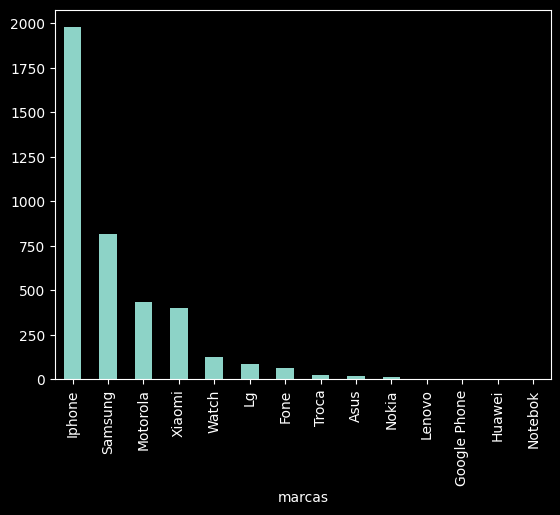

In [21]:
data_final.value_counts("marcas").plot(kind="bar")

<AxesSubplot:xlabel='count', ylabel='Estado'>

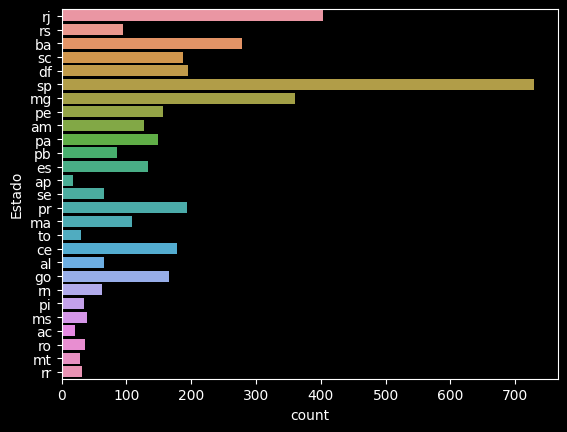

In [22]:
sns.countplot(data_final, y= "Estado")